In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from tensorflow import keras as kr

In [2]:
df = pd.read_csv("diamonds.csv")
df.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [3]:
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [4]:
df_dum = pd.get_dummies(df, drop_first = True)
df_dum.head(2)

carat  depth  table  price     x     y     z  cut_Good  cut_Ideal  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43         0          1   
1   0.21   59.8   61.0    326  3.89  3.84  2.31         0          0   

   cut_Premium  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
0            0  ...        0        0        0           0            0   
1            1  ...        0        0        0           0            1   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0            1            0            0             0             0  
1            0            0            0             0             0  

[2 rows x 24 columns]

In [5]:
df_dum.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

### Q. 데이터를 학습과 평가 데이터세트로 분할하고 이를 표준화 하시오.
※ 학습과 평가의 비율을 8:2 로 실시하시오.  
※ random_state는 123으로 지정하시오.  
※ 학습 데이터로 표준화 규칙을 만들고 해당규칙을 학습/평가 데이터 세트에 적용하시오.  
※ 정규화된 데이터 세트는 각각 df_train_nor, df_test_nor 객체에 저장하시오.  

In [6]:
df_train, df_test = train_test_split(df_dum, train_size = 0.8,
                                     random_state = 123)
model_nor = StandardScaler().fit(df_train.drop("price", axis = 1))
df_train_nor = model_nor.transform(df_train.drop("price", axis = 1))
df_test_nor  = model_nor.transform(df_test.drop("price", axis = 1))

In [7]:
input_shape = [df_train_nor.shape[1]]

model1 = kr.Sequential([kr.layers.Dense(64, 
                                        activation = "relu", 
                                        input_shape = input_shape), # column
                        kr.layers.Dense(64, activation = "relu"),
                        kr.layers.Dense(1)])
model1.compile(loss = "mse",
               optimizer = kr.optimizers.RMSprop(learning_rate = 0.001),
               metrics = ["mae", "mse"])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1536      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,761
Trainable params: 5,761
Non-trainable params: 0
_________________________________________________________________


In [31]:
hist1 = model1.fit(df_train_nor, df_train["price"],
                   epochs = 5, 
                   validation_split = 0.2, 
                   verbose = 1)

Epoch 1/5
1079/1079 [==============================] - 1s 781us/step - loss: 782047.1250 - mae: 331.7615 - mse: 782047.1250 - val_loss: 367496.1562 - val_mae: 325.3904 - val_mse: 367496.1562
Epoch 2/5
1079/1079 [==============================] - 1s 780us/step - loss: 776830.6250 - mae: 331.5608 - mse: 776830.6250 - val_loss: 353537.6562 - val_mae: 316.2999 - val_mse: 353537.6562
Epoch 3/5
1079/1079 [==============================] - 1s 822us/step - loss: 767835.6250 - mae: 331.0883 - mse: 767835.6250 - val_loss: 341541.3125 - val_mae: 311.5976 - val_mse: 341541.3125
Epoch 4/5
1079/1079 [==============================] - 1s 849us/step - loss: 760380.4375 - mae: 330.0653 - mse: 760380.4375 - val_loss: 338663.4688 - val_mae: 312.8468 - val_mse: 338663.4688
Epoch 5/5
1079/1079 [==============================] - 1s 882us/step - loss: 765624.7500 - mae: 329.5504 - mse: 765624.7500 - val_loss: 338130.5938 - val_mae: 308.8609 - val_mse: 338130.5938


In [27]:
df_hist1 = pd.DataFrame(hist1.history)
df_hist1["epoch"] = hist1.epoch
df_hist1.head(2)

loss         mae          mse     val_loss     val_mae      val_mse  \
0  867223.8750  362.085205  867223.8750  415558.6875  341.366943  415558.6875   
1  853419.9375  359.771942  853419.9375  421718.1875  343.508362  421718.1875   

   epoch  
0      0  
1      1

<AxesSubplot:xlabel='epoch'>

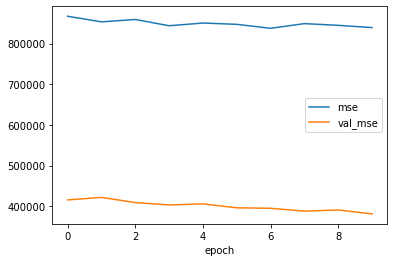

In [28]:
df_hist1[["epoch", "mse", "val_mse"]].plot.line(x = "epoch")

<AxesSubplot:xlabel='epoch'>

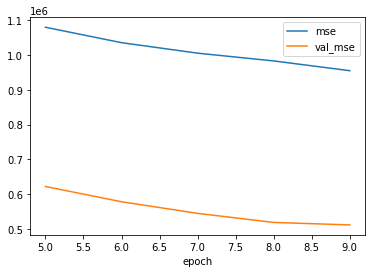

In [22]:
df_hist1[["epoch", "mse", "val_mse"]][5:].plot.line(x = "epoch")

In [12]:
pred1 = model1.predict(df_test_nor)
pred1 = pred1.transpose()[0]

In [13]:
mean_squared_error(y_true = df_test["price"],
                   y_pred = pred1)

597097.0466422493

In [14]:
mean_squared_error(y_true = df_test["price"],
                   y_pred = pred1) * 0.5

298548.52332112467

In [15]:
df_score = pd.DataFrame({"y_true": df_test["price"],
                         "y_pred": pred1})
df_score["diff"] = df_score["y_true"] - df_score["y_pred"]
df_score.head(2)

y_true      y_pred       diff
32685     802  769.015259  32.984741
36258     935  886.089172  48.910828

In [16]:
df_score["diff"].abs().max()

12952.05859375

### Q. sklearn 라이브러리의 LinearRegression() 함수를 사용하여 선형회귀를 구현하고 해당 모델의 MSE 를 확인하시오.

In [17]:
model_lr = LinearRegression().fit(X = df_train_nor,
                                  y = df_train["price"])
pred = model_lr.predict(df_test_nor)
pred[:5]

array([ 539.85155846,  197.92711851, 6670.48382906, 1332.17968979,
       3206.91341642])

In [18]:
mean_squared_error(y_true = df_test["price"], 
                   y_pred = pred)

1292038.7757041126

In [19]:
df_score2 = pd.DataFrame({"y_true": df_test["price"],
                          "y_pred": pred1})
df_score2["diff"] = df_score2["y_true"] - df_score2["y_pred"]
df_score2.head(2)

y_true      y_pred       diff
32685     802  769.015259  32.984741
36258     935  886.089172  48.910828

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
model_rf = RandomForestRegressor(n_estimators = 100).fit(X = df_train_nor,
                                                         y = df_train["price"])
pred_rf = model_rf.predict(df_test_nor)
mean_squared_error(y_true = df_test["price"], 
                   y_pred = pred_rf)

383728.63537754887